## Number of Points

if $n$ is even, then take $m=\frac{n}{2}$, then we have

\begin{equation}
    4(0+2+4+\cdots+2m)+1\\
    = 8(1+2+\cdots+m)+1 \\
    = 8\frac{m(m-1)}{2}+1 \\
    = 4m(m-1)+1
\end{equation}

if however n is odd, then take $m=\frac{m+1}{2}$, then we have

\begin{equation}
    4(1+3+\cdots+n) \\
    = 4(1+3+5+\cdots+\frac{2m-1}{2})\\
    = 4m^2
\end{equation}

In [1]:
points = []
n = 5

def ret_points_at_dist_n(n):
    points = []
    for x in range(1,5):
        y = n-x
        points.extend([(x, y), (-x, y), (x, -y), (-x, -y)])
    points.extend([(0, n), (0, -n), (n, 0), (-n, 0)])
    
    return points

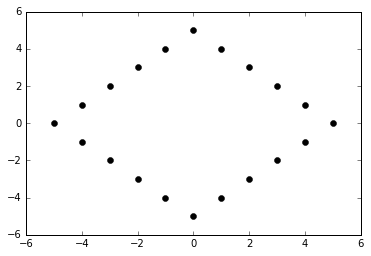

In [8]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array(ret_points_at_dist_n(n))

%matplotlib inline
plt.plot(points[:, 0], points[:, 1], 'ko')
plt.show()

In [46]:
@interact
def root_add(a=slider(vmin=-1., vmax=1., default=1.),
         b = slider(vmin=-1., vmax=1., default=1.)):
    
    M = matrix(CDF, [[a, b], [b, a]])
    v1 = M.eigenmatrix_right()[1][:, 0]
    v2 = M.eigenmatrix_right()[1][:, 1]
    eigs = arrow2d((0., 0.), (v1[0, 0], v1[1,0]), color='green', linestyle='--')
    eigs = eigs + arrow2d((0., 0.), (v2[0,0], v2[1,0]), color='green', linestyle='--')
    eigs = eigs+arrow2d((0, 0), (a, b), color='red')+arrow2d((0, 0), (b, a))
    show(eigs)


SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIHJvb3RfYWRkIGF0IDB4N2Y4ZDgyZmM1MDUwPiB3aXRoIDIgd2lkZ2V0cwogIGE6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHVlPTEuMCzigKY=


In [51]:
M = matrix(CDF, [[1, 2],[2,1]])
M.eigenmatrix_right()[1][:, 1][1,0]

0.7071067811865476

#### Now what if the movement is constricted to only L or R

First Let's build the `Decoder`

Given, current position and direction to begin with, we calculate the direction by multiplying $i, -i$ according to the previous step and add it to accumulator.

In [56]:
def decode_path(path, start=0+0j, start_dir=1j):
    """ Path is sequence of L and R """
    location  = start
    prev_dir = start_dir
    
    for c in path:
        if c == 'L':
            new_dir = prev_dir * 1j
        else:
            new_dir = prev_dir * (-1j)
        location += new_dir
        prev_dir = new_dir
    return location

In [59]:
print(decode_path('LRLR', start_dir=-1j))
print(decode_path('RLRL', start_dir=-1j))


2.00000000000000 - 2.00000000000000*I
-2.00000000000000 - 2.00000000000000*I


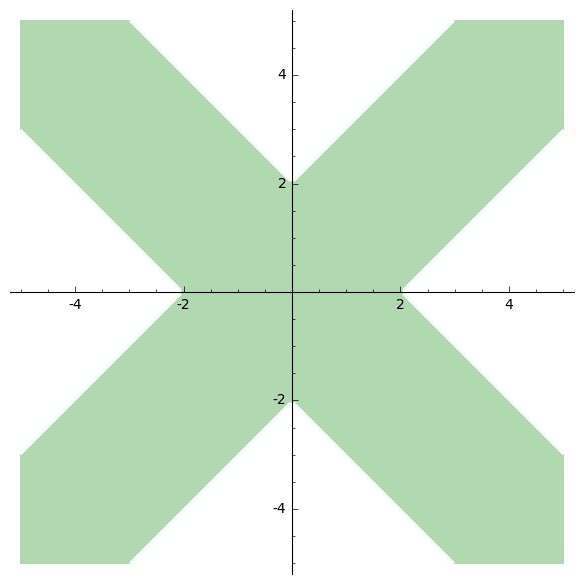

In [64]:
# Reachable points
var('x y')
region_plot(abs(abs(x)-abs(y))<=2, (x, -5, 5), (y, -5, 5), incol='green', alpha=0.3)